In [1]:
# Imports
import numpy as np
import random
import seaborn as sns
from scipy.optimize import linprog
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Definir a semente aleatória para reprodutibilidade
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

## Carregando os Dados

In [3]:
# Carregar o dataset
file_path = 'dataset.csv'
data = pd.read_csv(file_path)

## Análise de Regressão

In [4]:
# Imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Selecionar as variáveis para a regressão
X = data[['emissoesCO2e', 'populacao', 'qtdContratos', 'areaFinanciada']]  # Variáveis preditoras
y = data['totalFinanciado']  # Variável target

In [6]:
from sklearn.preprocessing import StandardScaler

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
# Definir o modelo Elastic Net com busca de hiperparâmetros
param_grid = {
    'alpha': [0.01, 0.1, 1, 10],  # Parâmetro de regularização
    'l1_ratio': [0.2, 0.5, 0.7, 1.0]  # Peso entre Lasso e Ridge
}

elastic_net = ElasticNet(random_state=42, max_iter=10000)
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.01, 0.1, 1, 10],
                         'l1_ratio': [0.2, 0.5, 0.7, 1.0]},
             scoring='r2')

In [9]:
# Melhor modelo encontrado
best_model = grid_search.best_estimator_

In [10]:
# Fazer previsões
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

In [11]:
# Avaliar o modelo
print("Melhores Parâmetros:", grid_search.best_params_)
print("R² (Treino):", r2_score(y_train, y_pred_train))
print("R² (Teste):", r2_score(y_test, y_pred_test))
print("RMSE (Teste):", np.sqrt(mean_squared_error(y_test, y_pred_test)))

Melhores Parâmetros: {'alpha': 0.01, 'l1_ratio': 1.0}
R² (Treino): 0.9788011751878921
R² (Teste): 0.9842670169660397
RMSE (Teste): 38541048.50533447


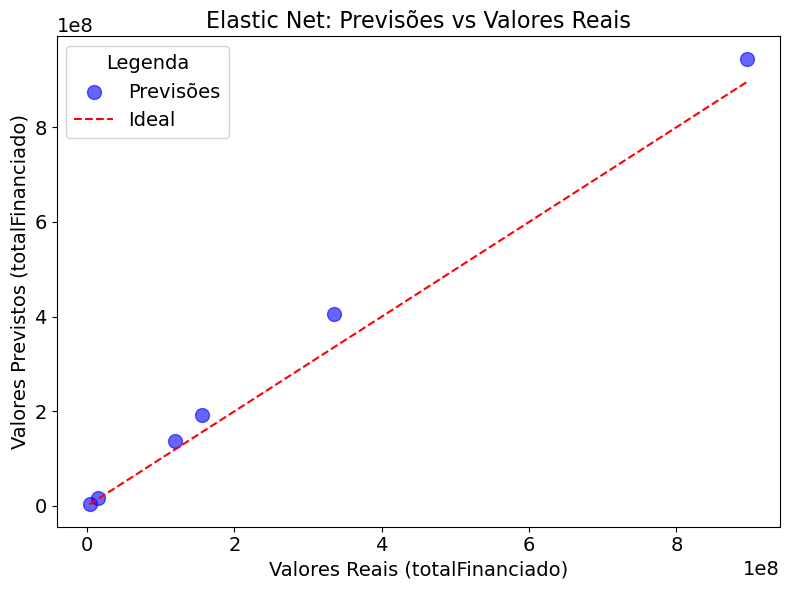

In [12]:
from matplotlib.ticker import ScalarFormatter

# Visualizar as previsões x valores reais
plt.figure(figsize=(8, 6))

# Ajustar o tamanho dos pontos no gráfico
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.6, label='Previsões', s=100)  # Tamanho dos pontos ajustado

# Linha ideal
plt.plot(
    [min(y_test), max(y_test)], 
    [min(y_test), max(y_test)], 
    color='red', linestyle='--', label='Ideal'
)

# Ajustar rótulos dos eixos
plt.xlabel('Valores Reais (totalFinanciado)', fontsize=14)  # Tamanho da fonte do eixo X
plt.ylabel('Valores Previstos (totalFinanciado)', fontsize=14)  # Tamanho da fonte do eixo Y

# Ajustar título
plt.title('Elastic Net: Previsões vs Valores Reais', fontsize=16)  # Tamanho da fonte do título

# Ajustar legenda
plt.legend(
    fontsize=14,  # Tamanho da fonte da legenda
    title='Legenda', 
    title_fontsize=14, 
    scatterpoints=1,  # Número de pontos exibidos na legenda
    markerscale=1  # Tamanho dos pontos na legenda em relação ao gráfico
)

# Ajustar ticks dos eixos
plt.xticks(fontsize=14)  # Tamanho da fonte dos ticks do eixo X
plt.yticks(fontsize=14)  # Tamanho da fonte dos ticks do eixo Y

# Ajustar as ordens de grandeza nos eixos
ax = plt.gca()
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.get_offset_text().set_fontsize(14)  # Tamanho da fonte das ordens de grandeza no eixo X
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.get_offset_text().set_fontsize(14)  # Tamanho da fonte das ordens de grandeza no eixo Y

plt.tight_layout()
plt.show()

# Fim